In [1]:
from glob import glob
from os.path import join
import pandas as pd
import numpy as np

from maps.pings import Pings
from maps.maps import FoliumMap

location_data_dirpath = '../../data/locations/'
photo_metadata_dirpath = '../../data/photo_metadata'

pings_data_path = join(location_data_dirpath, 'pings.hdf')
posts_path = join(photo_metadata_dirpath, 'posts.hdf')

%reload_ext autoreload
%autoreload 2

In [2]:
# load geolocated photos
posts = pd.read_hdf(posts_path, 'data')
photos = posts[~posts.latitude.isna()]

In [3]:
# import pickle

# # load all pings
# ping_data = pd.read_hdf(pings_data_path, 'data')
# ping_data = ping_data[ping_data.accuracy < 3000]
# ping_data = ping_data[ping_data.altitude < 4000]

# # geocode trip pings
# pings = Pings(ping_data.loc['2019-07-24':], 2)
# pings.cluster(use_weights=False, n_clusters=500)
# pings.build_geocodes()
# pings.geocode()

# #save clustered pings
# pickled_pings_path = join(location_data_dirpath, 'clustered_pings.pkl')
# with open(pickled_pings_path, 'wb') as file:
#     pickle.dump(pings, file)

In [1071]:
# from scipy.spatial import distance, distance_matrix
# from modules.utilities import haversine
# import numpy as np

# def compute_max_distance(df):
#     xy = df[trip.GPS_INDEX].values
#     if xy.shape[0] <= 1:
#         return np.nan
#     else:
#         max_distance = distance.pdist(xy, metric=haversine).max()
#         return max_distance
    
# def compute_mean_speed(df):
#     if len(df) <= 1:
#         return np.nan
#     total_hours = (df.index.max() - df.index.min()).total_seconds() / 3600
#     xy = df[trip.GPS_INDEX].values
#     total_miles = sum([haversine(a,b) for a, b in zip(xy[:-1], xy[1:])])
#     mean_speed = total_miles / total_hours
#     return mean_speed

# window_size = 60

# pings._pings['window_max_distance'] = None
# pings._pings['window_velocity'] = None

# for owner, df in pings._pings.groupby('owner'):
#     time_window = df.loc[owner].index.round("{:d}T".format(window_size))
#     speed_per_time_window = df.loc[owner].groupby(time_window).apply(compute_mean_speed)
#     max_distance_per_time_window = df.loc[owner].groupby(time_window).apply(compute_max_distance)
#     pings._pings.loc[owner, 'window_velocity'] = speed_per_time_window.loc[time_window].values
#     pings._pings.loc[owner, 'window_max_distance'] = max_distance_per_time_window.loc[time_window].values
    
# #save clustered pings
# pickled_pings_path = join(location_data_dirpath, 'clustered_pings.pkl')
# with open(pickled_pings_path, 'wb') as file:
#     pickle.dump(pings, file)

In [523]:
import pickle

# load clustered pings
pickled_pings_path = join(location_data_dirpath, 'clustered_pings.pkl')
with open(pickled_pings_path, 'rb') as file:
    pings = pickle.load(file)

In [524]:
# label time periods
time_periods = {
    'July': ('2019-07-24', '2019-07-28'),
    'August-November': ('2019-08-11', '2019-11-09'),
    'December': ('2019-12-01', '2019-12-24'),
    'February': ('2020-02-25', '2020-03-17')
}

pings.label_timespans('time_period', time_periods)

In [525]:
trip_ids = {'Highway 1': ('2019-07-24 00:10:30', '2019-07-31 23:54:08'),
 'France': ('2019-08-12 03:50:39', '2019-08-20 21:04:50'),
 'Italian Coast': ('2019-08-20 16:35:51', '2019-09-11 10:20:21'),
 'England': ('2019-09-11 08:18:40', '2019-09-25 14:31:47'),
 'Central Europe': ('2019-09-25 12:19:46', '2019-10-22 12:09:37'),
 'Catalonia': ('2019-11-02 11:49:07', '2019-11-07 14:22:22'),
 'Morocco': ('2019-12-03 20:36:19', '2019-12-13 02:15:52'),
 'Italian Alps': ('2019-12-13 10:43:52', '2019-12-24 03:23:37'),
 'Rocky Mountains': ('2020-02-25 00:07:38', '2020-03-17 23:57:50')}

pings.label_timespans('trip_id', trip_ids)


In [675]:
# drives, flights = trips.segments['land'], trips.segments['air']

# highway1_drive = [d for d in drives if 'San Diego' in d.cities][0]
# france_flights = [f for f in flights if 'FR' in f.countries and f.stop_ts<'2019-11-01']
# italian_coast_flights = [f for f in flights if 'IT' in f.countries and f.stop_ts<'2019-11-01']
# england_flights = [f for f in flights if 'GB' in f.countries and f.stop_ts < '2019-09-26']
# central_europe_flights = [f for f in flights if 'CZ' in f.countries]
# catalonia_flights = [f for f in flights if 'ES' in f.countries and f.stop_ts<'2019-12-01']
# morocco_flights = [f for f in flights if 'MA' in f.countries]
# italian_alps_flights = [f for f in flights if 'IT' in f.countries and f.start_ts>'2019-12-01']
# rockies_drive = [d for d in drives if 'Wyoming' in d.states][0]

# # label trips
# trip_ids = {
#     'Highway 1': (highway1_drive.start_ts, highway1_drive.stop_ts),
#     'France': (france_flights[0].start_ts, france_flights[-1].stop_ts),
#     'Italian Coast': (italian_coast_flights[0].start_ts, italian_coast_flights[-1].stop_ts),
#     'England': (england_flights[0].start_ts, england_flights[-1].stop_ts),
#     'Central Europe': (central_europe_flights[0].start_ts, central_europe_flights[-1].stop_ts),
#     'Catalonia': (catalonia_flights[0].start_ts, catalonia_flights[-1].stop_ts),
#     'Morocco': (morocco_flights[0].start_ts, morocco_flights[-1].stop_ts),
#     'Italian Alps': (italian_alps_flights[0].start_ts, italian_alps_flights[-1].stop_ts),
#     'Rocky Mountains': (rockies_drive.start_ts, rockies_drive.stop_ts)
# }

# Composite map

In [526]:
from maps.trips import TripGenerator

In [535]:
# compile trip generator
trips = TripGenerator(pings, photos)

# mark returns
for flight in trips.segments['air']:
    if 'California' in flight.destination.state:
        flight.add_trip_id('Return Flights')
    if 'Berlin' in flight.origin_str:
        flight.add_trip_id('Return Flights')

/Users/Sebi/Documents/websites/sbernasek/code/maps/trips.py:257: RuntimeWarning: divide by zero encountered in true_divide
  for idx in np.logical_and(dx > 250, (dx/dt)>50).nonzero()[0]:


# Generate trip

In [ ]:
"""
- add hikes/ski days
- smooth drives
- fix photo captions
- photo centering/lightbox
"""

In [536]:
trip_names = ['Highway 1',
'France',
'Italian Coast',
'England',
'Central Europe',
'Catalonia',
'Morocco',
'Italian Alps',
'Rocky Mountains',
'Return Flights']

In [537]:
trip_name = 'Central Europe'
filename = '-'.join([x.lower() for x in trip_name.split()]) +'.html'

In [552]:
trip_ids = (trip_name,)
trip = trips.get_trip(*trip_ids)
trip.build_map(location=[44.6, 7.8], zoom_start=5, max_zoom=16)
trip.add_photos_to_map(True, maxClusterRadius=50, disableClusteringAtZoom=10, zoomToBoundsOnClick=True)
trip.add_heatmap_to_map(show=True, radius=20, blur=30, max_zoom=12, min_opacity=0., max_val=3.)
trip.add_travel_to_map(weight=3, drive_color='black', 
                       drive_kwargs={'min_velocity': None, 'min_distance': None, 'freq': '10T'})
trip.add_layer_control()

In [553]:
trip.map

In [564]:
from rdp import rdp

In [568]:
x

[[50.086751, 14.4511694], [50.0910875, 14.4250312]]

In [556]:
drive = trip.segments['land'][-1]

In [591]:
xy = drive.data[drive.GPS_INDEX]

epsilon = 0.5
xy_rdp = np.array(rdp(xy, epsilon=epsilon))

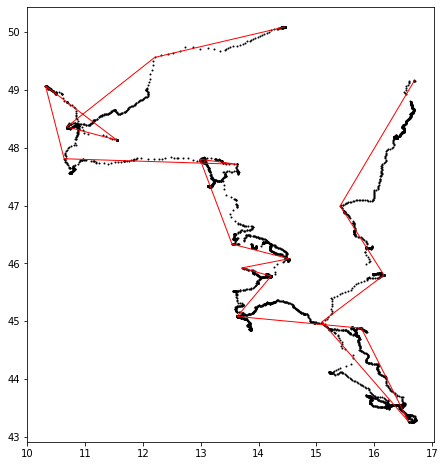

In [592]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(*xy.values.T[::-1], s=1, c='k')
ax.plot(*xy_rdp.T[::-1], lw=1, c='r')

ax.set_aspect(1)

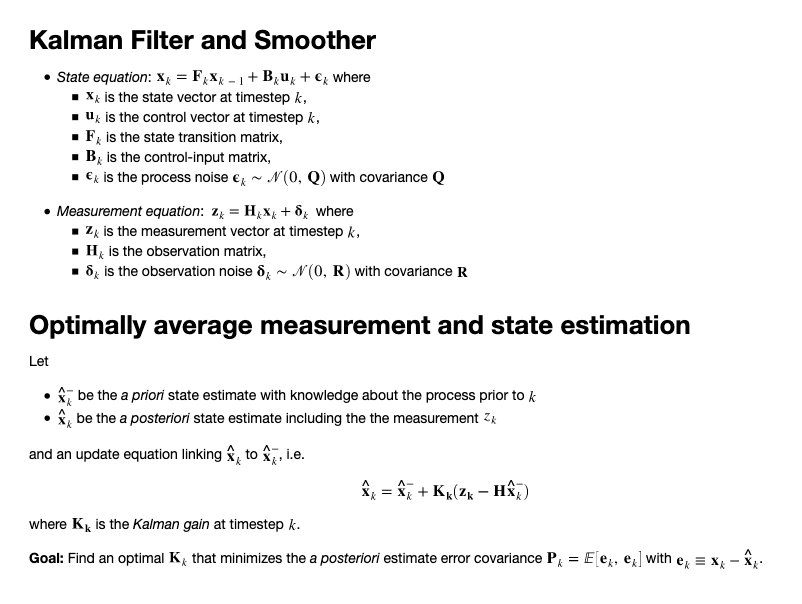

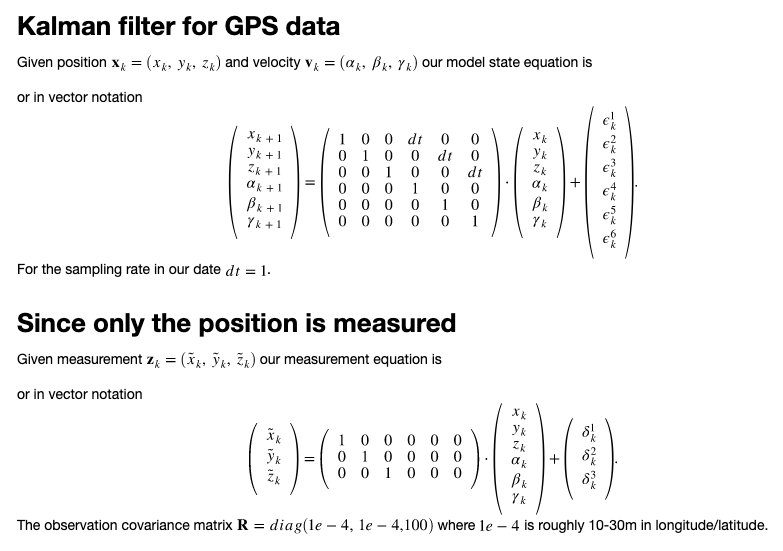

In [653]:
xy_uniform = xy.resample('1H').mean()
xy_uniform_measured = np.ma.masked_invalid(xy_uniform.values)

In [ ]:
#plt.plot(measurements[:,0], measurements[:,1])
#filled_coords = coords.fillna(method='pad').ix[coords.ele.isnull()]
#plt.plot(filled_coords['lon'].values, filled_coords['lat'].values, 'ro');

In [659]:
from pykalman import KalmanFilter


def kalman(XY):
    
    F = np.array([[1, 0, 1, 0],
              [0, 1, 0, 1],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

    H = np.array([[1, 0, 0, 0],
                  [0, 1, 0, 0]])

    R = np.diag([1e-6, 1e-6])**2

    initial_state_mean = np.hstack([XY[0, :], 2*[0.]])
    initial_state_covariance = np.diag([1e-6, 1e-6, 1e-6, 1e-6])**2

    kf = KalmanFilter(transition_matrices=F, 
                      observation_matrices=H, 
                      observation_covariance=R,
                      initial_state_mean=initial_state_mean,
                      initial_state_covariance=initial_state_covariance,
                      em_vars=['transition_covariance'])
    
    return kf
    

In [660]:
kf = kalman(xy_uniform_measured)

In [663]:
kf = kf.em(xy_uniform_measured, n_iter=1000) # takes a very long time
state_means, state_vars = kf.smooth(xy_uniform_measured)

In [698]:
from scipy.spatial import Delaunay

In [777]:
class Triangulation(Delaunay):
    
    def __getitem__(self, k):
        indices, indptr = self.vertex_neighbor_vertices
        return indptr[indices[k]:indices[k+1]]
  

In [793]:
XY = xy.values

epsilon = 0.01
XY_RDP = np.array(rdp(XY, epsilon=epsilon))

tri = Triangulation(XY_RDP)

PATH = [0]
on_path = True
neighbors = tri[0]
for POINT_IDX in range(1, tri.points.shape[0]):
    
    if POINT_IDX in neighbors:
        on_path = True
        PATH.append(POINT_IDX)        
        neighbors = tri[POINT_IDX]
    else:
        on_path = False

PATH_XY = tri.points[np.array(PATH)]

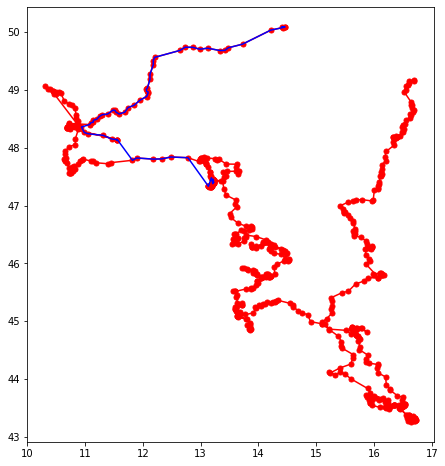

In [794]:
fig, ax = plt.subplots(figsize=(8,8))
#ax.plot(*XY.T[::-1], '.r', markersize=10)
ax.plot(*XY_RDP.T[::-1], '.-r', markersize=10)
ax.plot(*PATH_XY.T[::-1], '-b')
ax.set_aspect(1)

In [716]:
from itertools import permutations
from functools import reduce
from operator import add

[(3236, 3905),
 (3236, 3808),
 (3905, 3236),
 (3905, 3808),
 (3808, 3236),
 (3808, 3905)]

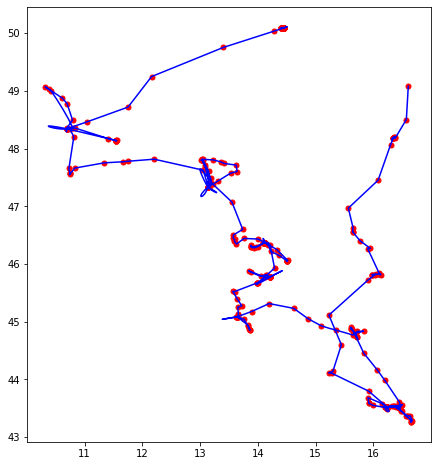

In [664]:
fig, ax = plt.subplots(figsize=(8,8))
#ax.scatter(*xy.values.T[::-1], s=1, c='k')
#ax.plot(*xy_rdp.T[::-1], lw=1, c='r')
ax.plot(*xy_uniform_measured.T[::-1], '.r', markersize=10)
ax.plot(*state_means[:, :2].T[::-1], 'b')
ax.set_aspect(1)

In [665]:
from shapely.geometry import Polygon

In [563]:
m = FoliumMap()
m.build_map(xy.values.mean(axis=0))
m.add_bubbles(xy.values, radius=5)
m.map

In [237]:
xy = drive.data[drive.GPS_INDEX]

In [256]:
drive.data['path_length'] = pd.concat([xy, xy.shift(1)], axis=1).apply(lambda x: haversine(x.iloc[:2], x.iloc[2:]), axis=1)
drive.data['path_progress'] = drive.data.distance.cumsum()
distance_from_origin = drive.data[drive.GPS_INDEX].apply(lambda x: haversine(x, drive.data[drive.GPS_INDEX].iloc[0]), axis=1)
drive.data['distance_from_origin'] = distance_from_origin

In [284]:
from copy import deepcopy

In [288]:
TEST = deepcopy(drive.data)
TEST = TEST[['latitude', 'longitude', 'distance_from_origin']]

In [320]:
from scipy.interpolate import interp1d, interp2d

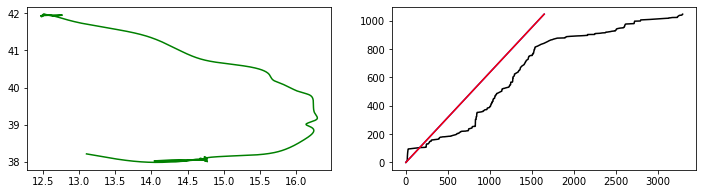

In [522]:
P = drive.data.path_progress.values
P[0] = 0
X = drive.data.latitude.values
Y = drive.data.longitude.values

compression = 0.5
kind = 'linear'

# resample for uniform mileage progress
N = int((1 - compression)*len(P))
Pp = np.linspace(0, P.max(), N)
Xp = interp1d(P, X, kind=kind)(Pp)
Yp = interp1d(P, Y, kind=kind)(Pp)

# smooth resamples 1oordinates
miles_per_window = 10 # miles of progress
miles_driven = P.max()
samples_per_mile = N / miles_driven
samples_per_window = miles_per_window * samples_per_mile
window_size = max(int(samples_per_window//1), 1)
if window_size % 2 == 0:
    window_size += 1
Pp_smooth = savgol_filter(Pp, window_size, polyorder=1)
Xp_smooth = savgol_filter(Xp, window_size, polyorder=1)
Yp_smooth = savgol_filter(Yp, window_size, polyorder=1)


# plot
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 3))
#ax0.plot(Y, X, '-k')
ax1.plot(P, '-k')

# uniform sample
#ax0.plot(Yp, Xp, '-b')
ax1.plot(Pp, '-b')

# smoothed uniform sample
#ax0.plot(Yp_smooth, Xp_smooth, '-r')
ax1.plot(Pp_smooth, '-r')

s = 1.
XIT, YIT = interpolate_polyline(np.stack([Xp,Yp]).T, 1000, s=s).T

ax0.plot(YIT, XIT, '-g')

In [501]:
exclude points near hubs

In [ ]:
interpolate_polyline

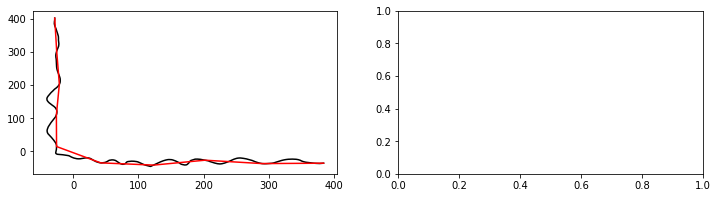

In [494]:
# plot
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(12, 3))
ax0.plot(*path.T, '-k')
ax0.plot(*interpolate_polyline(path, 10).T, '-r')

In [ ]:
interp.splprep()

In [508]:
import numpy as np
import scipy.interpolate as interp

def interpolate_polyline(polyline, num_points, s):
    duplicates = []
    for i in range(1, len(polyline)):
        if np.allclose(polyline[i], polyline[i-1]):
            duplicates.append(i)
    if duplicates:
        polyline = np.delete(polyline, duplicates, axis=0)
    tck, u = interp.splprep(polyline.T, s=s)
    u = np.linspace(0.0, 1.0, num_points)
    return np.column_stack(interp.splev(u, tck))

In [198]:
pings['progress'] = np.cumsum([0] + [haversine(x,y) for x,y in zip(xy[:-1], xy[1:])])

ValueError: too many values to unpack (expected 2)

In [830]:
# import requests

# responses = {}
# for segment in trips.segments['air'] + trips.segments['rail']:
#     for port in (segment.origin, segment.destination):
#         gps = tuple(port[segment.GPS_INDEX].values.tolist())
#         query = 'https://api.aerisapi.com/places/closest?p={:2.6f},{:2.6f}&query=pop:250000&radius=50mi&limit=5&client_id={:s}&client_secret={:s}'.format(*gps, aeris_keys['ACCESS_ID'],aeris_keys['SECRET_KEY'])
#         response = requests.get(query)
#         responses[gps] = sorted(response.json()['response'], key=lambda x: x['relativeTo']['distanceKM'], reverse=False)

In [ ]:
"""
fix driving route to exclude re
center photos (in lightbox?)
add ski/hike track popups
"""

In [727]:
trip.save_map('../travel/maps/{:s}'.format(filename))